# HOD extractor

In [1]:
##### External Packages
import numpy as np
import deepdish as dd
import sys
from scipy.special import erf

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
HOD = dd.io.load('Fit.hdf5')
print HOD.keys()

['age_HOD', 'full_HOD', 'concentration_HOD']


In [3]:
def HOD_NSat(log_Mh, log_Mcut, log_M1, alpha):
    return np.where(log_Mh < log_Mcut, 0, ((10**log_Mh-10**log_Mcut)/10**log_M1)**alpha)

def HOD_NCen(log_Mh, log_Mmin, sigmaLogM):
    return 0.5*(1+erf((log_Mh-log_Mmin)/sigmaLogM))

### HOD split by centrals and satellites

/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


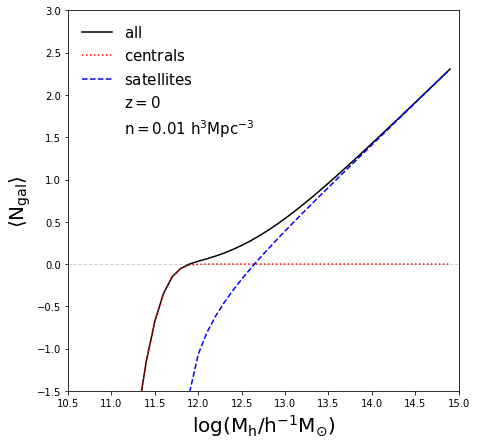

In [4]:
def plot():    
    fig,ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    gs = gridspec.GridSpec(1, 1)
    gs.update(hspace=0.0)
    ax = plt.subplot(gs[0,0])
        
    ax.plot([10,16],[0,0], color='#D3D3D3', linewidth=1, linestyle = '--')
    selHOD = HOD['full_HOD']['Stell']['0.01']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    ####################################################################################################
    log_Mh = np.arange(10, 15, 0.1)
    Ngal, Ncen, Nsat = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM), HOD_NCen(log_Mh, log_Mmin, sigmaLogM), HOD_NSat(log_Mh, log_Mcut, log_M1, alpha)
    ax.plot(log_Mh,np.log10(Ngal), 'k-', label=r'$\rm all$')
    ax.plot(log_Mh,np.log10(Ncen), 'r:', label=r'$\rm centrals$')
    ax.plot(log_Mh,np.log10(Nsat), 'b--', label=r'$\rm satellites$')
    ax.plot([],[], ' ', label=r'$\rm z = 0$')
    ax.plot([],[], ' ', label=r'$\rm n = 0.01\ h^3Mpc^{-3}$')
    ax.legend(loc='upper left', shadow=True,fontsize=15,frameon=False) 
    ####################################################################################################
    ax.set_xlim([10.5,15])
    ax.set_ylim([-1.5, 3])
    ####################################################################################################
    ax.set_ylabel(r'$\rm \langle N_{gal} \rangle$', fontsize=20)
    ax.set_xlabel(r'$\rm log(M_{h}/h^{-1}M_{\odot})$', fontsize=20)
    plt.savefig('Plots/HOD_example.pdf',rasterized=True,papertype = 'b10', bbox_inches='tight')
plot()


### HOD evolution with redshift

/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


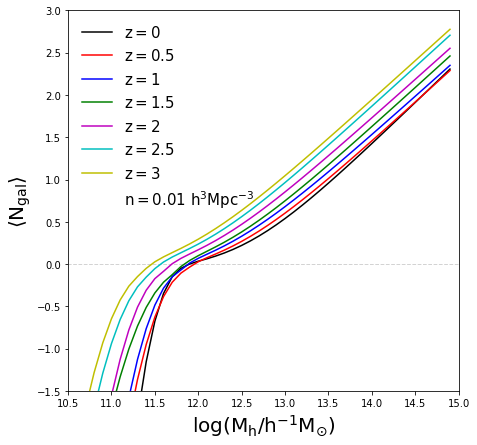

In [5]:
def plot():    
    fig,ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    gs = gridspec.GridSpec(1, 1)
    gs.update(hspace=0.0)
    ax = plt.subplot(gs[0,0])
        
    ax.plot([10,16],[0,0], color='#D3D3D3', linewidth=1, linestyle = '--')
    ####################################################################################################
    log_Mh = np.arange(10, 15, 0.1)
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'k-', label=r'$\rm z=0$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z0.5']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'r-', label=r'$\rm z=0.5$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z1']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'b-', label=r'$\rm z=1$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z1.5']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'g-', label=r'$\rm z=1.5$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z2']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'm-', label=r'$\rm z=2$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z2.5']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'c-', label=r'$\rm z=2.5$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z3']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'y-', label=r'$\rm z=3$')
    
    ax.plot([],[], ' ', label=r'$\rm n = 0.01\ h^3Mpc^{-3}$')
    ax.legend(loc='upper left', shadow=True,fontsize=15,frameon=False) 
    ####################################################################################################
    ax.set_xlim([10.5,15])
    ax.set_ylim([-1.5, 3])
    ####################################################################################################
    ax.set_ylabel(r'$\rm \langle N_{gal} \rangle$', fontsize=20)
    ax.set_xlabel(r'$\rm log(M_{h}/h^{-1}M_{\odot})$', fontsize=20)
    plt.savefig('Plots/HOD_redshift_dependence.pdf',rasterized=True,papertype = 'b10', bbox_inches='tight')
plot()


### HOD evolution with number density

/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


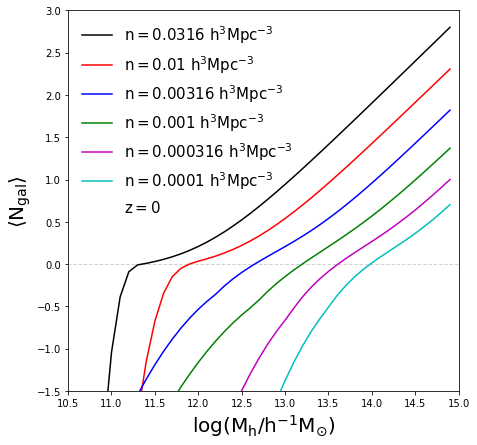

In [6]:
def plot():    
    fig,ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    gs = gridspec.GridSpec(1, 1)
    gs.update(hspace=0.0)
    ax = plt.subplot(gs[0,0])
        
    ax.plot([10,16],[0,0], color='#D3D3D3', linewidth=1, linestyle = '--')
    ####################################################################################################
    log_Mh = np.arange(10, 15, 0.1)
    
    selHOD = HOD['full_HOD']['Stell']['0.0316']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'k-', label=r'$\rm n = 0.0316\ h^3Mpc^{-3}$')
    
    selHOD = HOD['full_HOD']['Stell']['0.01']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'r-', label=r'$\rm n = 0.01\ h^3Mpc^{-3}$')
    
    selHOD = HOD['full_HOD']['Stell']['0.00316']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'b-', label=r'$\rm n = 0.00316\ h^3Mpc^{-3}$')
    
    selHOD = HOD['full_HOD']['Stell']['0.001']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'g-', label=r'$\rm n = 0.001\ h^3Mpc^{-3}$')
    
    selHOD = HOD['full_HOD']['Stell']['0.000316']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'm-', label=r'$\rm n = 0.000316\ h^3Mpc^{-3}$')
    
    selHOD = HOD['full_HOD']['Stell']['0.0001']['z0']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), 'c-', label=r'$\rm n = 0.0001\ h^3Mpc^{-3}$')
    
    
    ax.plot([],[], ' ', label=r'$\rm z=0$')
    ax.legend(loc='upper left', shadow=True,fontsize=15,frameon=False) 
    ####################################################################################################
    ax.set_xlim([10.5,15])
    ax.set_ylim([-1.5, 3])
    ####################################################################################################
    ax.set_ylabel(r'$\rm \langle N_{gal} \rangle$', fontsize=20)
    ax.set_xlabel(r'$\rm log(M_{h}/h^{-1}M_{\odot})$', fontsize=20)
    plt.savefig('Plots/HOD_nden_dependence.pdf',rasterized=True,papertype = 'b10', bbox_inches='tight')
plot()


### HOD dependence with halo age

/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/home/sergio/.local/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encounter

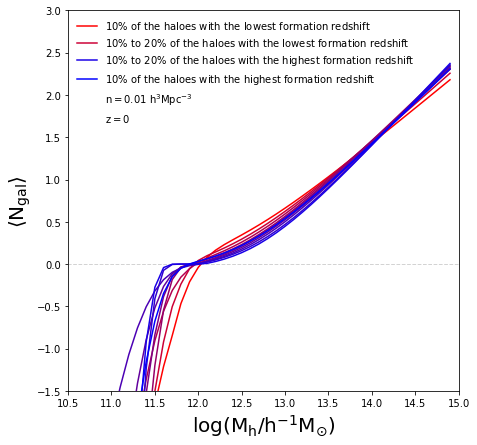

In [7]:
def plot():    
    fig,ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    gs = gridspec.GridSpec(1, 1)
    gs.update(hspace=0.0)
    ax = plt.subplot(gs[0,0])
        
    ax.plot([10,16],[0,0], color='#D3D3D3', linewidth=1, linestyle = '--')
    ####################################################################################################
    log_Mh = np.arange(10, 15, 0.1)
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['0-10']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#ff0000', label=r'$\rm 10\%\ of\ the\ haloes\ with\ the\ lowest\ formation\ redshift$')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['10-20']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#cc0035', label=r'$\rm 10\%\ to\ 20\%\ of\ the\ haloes\ with\ the\ lowest\ formation\ redshift$')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['20-30']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#b2004f')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['30-40']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#960067')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['40-50']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#7e0083')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['50-60']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#62009d')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['60-70']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#4b00b4')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['70-80']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#3100ce')
            
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['80-90']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#1900e6', label=r'$\rm 10\%\ to\ 20\%\ of\ the\ haloes\ with\ the\ highest\ formation\ redshift$')
    
    selHOD = HOD['age_HOD']['Stell']['0.01']['z0']['90-100']
    log_Mmin, sigmaLogM, log_Mcut, log_M1, alpha = selHOD['log_Mmin'][0], selHOD['sigmaLogM'][0], selHOD['log_Mcut'][0], selHOD['log_M1'][0], selHOD['alpha'][0]
    Ngal = HOD_NSat(log_Mh, log_Mcut, log_M1, alpha) + HOD_NCen(log_Mh, log_Mmin, sigmaLogM)
    ax.plot(log_Mh,np.log10(Ngal), color='#0000ff', label=r'$\rm 10\%\ of\ the\ haloes\ with\ the\ highest\ formation\ redshift$')
    
    ax.plot([],[], ' ', label=r'$\rm n = 0.01\ h^3Mpc^{-3}$')
    ax.plot([],[], ' ', label=r'$\rm z = 0$')
    ax.legend(loc='upper left', shadow=True,fontsize=10,frameon=False) 
    ####################################################################################################
    ax.set_xlim([10.5,15])
    ax.set_ylim([-1.5, 3])
    ####################################################################################################
    ax.set_ylabel(r'$\rm \langle N_{gal} \rangle$', fontsize=20)
    ax.set_xlabel(r'$\rm log(M_{h}/h^{-1}M_{\odot})$', fontsize=20)
    plt.savefig('Plots/HOD_age_dependence.pdf',rasterized=True,papertype = 'b10', bbox_inches='tight')
plot()
